In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import sys
import os

import numpy as np
import pandas as pd

sys.path.append('../../')

In [2]:
#IN_FILE = ("perf_node-test-case-06-1024x10.txt")
IN_FILE = ("perf_node-scan-01.txt")
LIDAR_MODE = "1024x10"

df = pd.read_csv(IN_FILE, sep=",", header=0)

In [3]:
# Adapted from some work I did on the ifm3d project:
# https://github.com/ifm/ifm3d/blob/master/doc/jitter/jitter.ipynb

def plot_raw(df, title=''):
    ax = df.plot(marker='.', linestyle='', grid=True, title=title)
    ax.set_xlabel("Sample Number")
    ax.set_ylabel("Latency (ms)")
    return df

def plot_pct(df, title):
    df2 = df.quantile(q=np.linspace(0,1,df.shape[0]))
    ax = df2.plot(marker='x', linestyle='', grid=True, title=title)
    ax.set_xlabel("% of sample")
    ax.set_ylabel("Latency (ms)")
    return df2

<IPython.core.display.Javascript object>


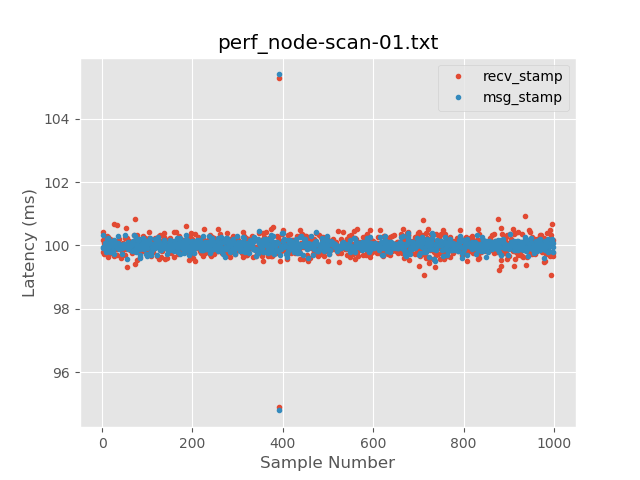

In [4]:
df2 = df.diff()*1e-6
_ = plot_raw(df2, IN_FILE)

<IPython.core.display.Javascript object>


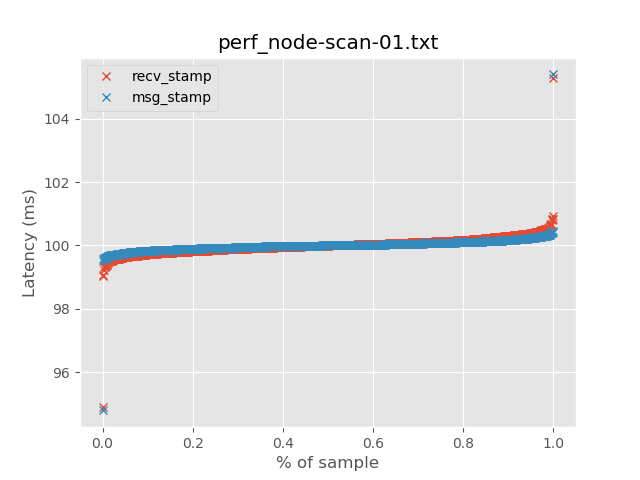

In [5]:
df3 = plot_pct(df2, IN_FILE)

In [6]:
df2.describe()

,recv_stamp,msg_stamp
count,999.000000,999.000000
mean,99.999854,99.999458
std,0.328060,0.274641
min,94.896744,94.788462
25%,99.850644,99.921980
50%,99.998917,100.001650
75%,100.131632,100.079660
max,105.306182,105.405664


In [7]:
df2_median = df2.median()
df2_median

recv_stamp     99.998917
msg_stamp     100.001650
dtype: float64

In [8]:
# The MAD gives us: "the most typical deviation from the most typical latency of X ms will be Y ms".
np.abs(df2.recv_stamp - df2_median.recv_stamp).median(), np.abs(df2.msg_stamp - df2_median.msg_stamp).median()

(0.141019, 0.07849000000000217)

<IPython.core.display.Javascript object>


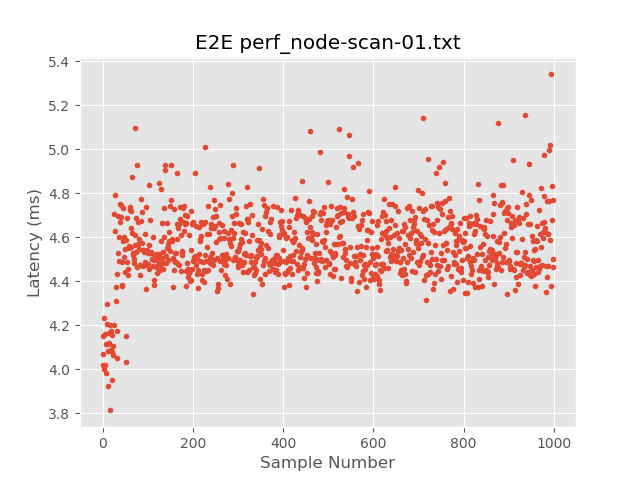

In [9]:
df_e2e = (df.recv_stamp - df.msg_stamp) * 1e-6
_ = plot_raw(df_e2e, "E2E %s" % IN_FILE)

<IPython.core.display.Javascript object>


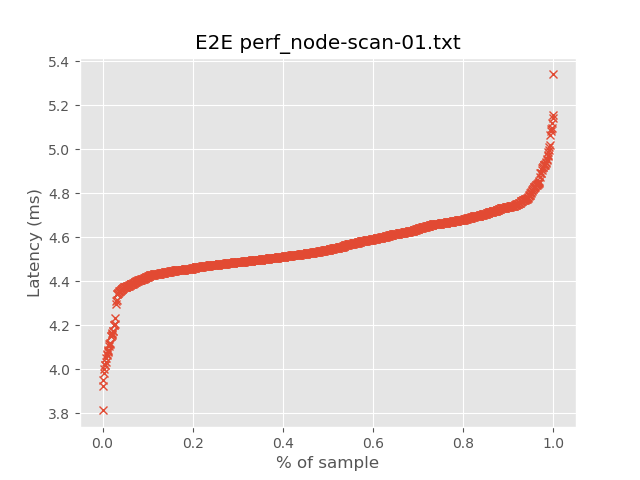

In [10]:
df4 = plot_pct(df_e2e, "E2E %s" % IN_FILE)

In [11]:
df_e2e.describe()

count    1000.000000
mean        4.563838
std         0.157052
min         3.812853
25%         4.474413
50%         4.543530
75%         4.662871
max         5.339882
dtype: float64

In [12]:
df_e2e_median = df_e2e.median()
df_e2e_median

4.54353

In [13]:
np.abs(df_e2e - df_e2e_median).median()

0.08847300000000002